# Sorting with an Avoided Crossing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.typing as npt

from eigenshuffle import eigenshuffle_eigh

plt.rcParams["font.size"] = 13


In [2]:
def hamiltonian(coupling: float) -> npt.NDArray[np.float64]:
    return np.array([[0, coupling], [coupling, 1e-2]], dtype=np.float64)


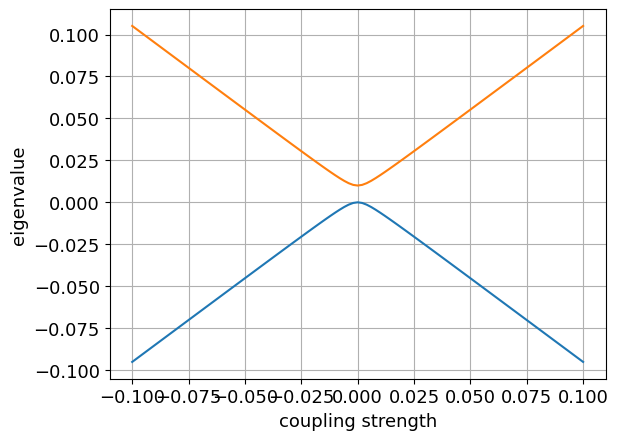

In [3]:
couplings = np.linspace(-1e-1, 1e-1, 101)
Aseq = np.array([hamiltonian(c) for c in couplings])

e, v = np.linalg.eigh(Aseq)

fig, ax = plt.subplots()
ax.plot(couplings, e)
ax.set_xlabel("coupling strength")
ax.set_ylabel("eigenvalue")
ax.grid()


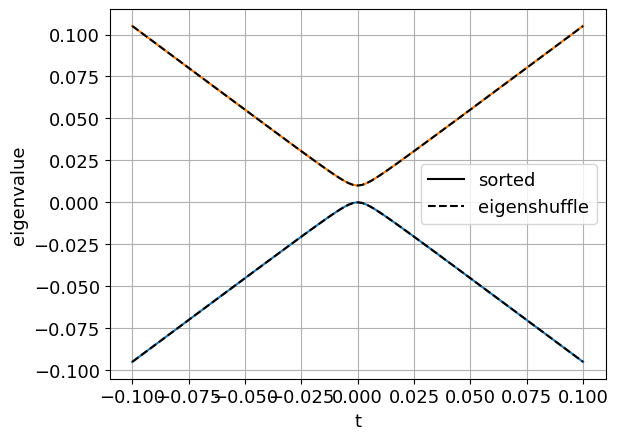

In [6]:
# sorting original eig result from low to high
v[np.argsort(e)]
e = np.sort(e)

es, vs = eigenshuffle_eigh(Aseq)

fig, ax = plt.subplots()
ax.plot(couplings, e)
ax.plot(couplings, es, "k--")

# for generating the legend
line1 = plt.Line2D([0, 1], [0, 1], linestyle="-", color="black")
line2 = plt.Line2D([0, 1], [0, 1], linestyle="--", color="black")

ax.set_xlabel("t")
ax.set_ylabel("eigenvalue")
ax.legend([line1, line2], ["sorted", "eigenshuffle"])
ax.grid()
